In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection

In [84]:
file="/home/charvijain16/Desktop/PrivacyPreservingSensitiveData/Preprocessing/preprocessed_data1.csv"
df=pd.read_csv(file, encoding = 'ISO-8859-3')

In [85]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head(5))

,doppelt,GeschlechtNum,Alter,AlterGebärf,Altersklassen,BMI,BMIKlassen,artHyperCodiert,DiabMellCodiert,BlutverdünnerCodiert,NikotinCodiert,PHASES,AnzahlAns,TrägZusCodiert,TrägSeitCodiert,SABAnsLänge,SABAnsBreite,LängeGruppiert,LängePhases,FormCodiert,cerebrAnoCodiert,VglOffenInterv,TherCodiert,Zustand30Tage,Zustand1Jahr,btnlCodiert,GOSlängstmöglich,WiedereinstCodiert,GrössnachInterCodiert,ZeitzumReEinstrom,ZeitinIntervallen,ZweiteingriffeAne,ZweiteingrCodiert,RuptCodiert,KomplCodiert,filter_$,GrössWährCodiert,YearsfromBeginning,label
0,1,2.0,62.0,2.0,13.0,34.0,4.0,2.0,1.0,3.0,0.0,6.0,2.0,2.0,3.0,3.0,2.0,1.0,1.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0,1
1,1,2.0,30.0,1.0,7.0,26.0,3.0,1.0,1.0,3.0,0.0,5.0,2.0,5.0,9.0,2.0,2.0,1.0,1.0,4.0,1.0,3.0,5.0,0.0,0.0,2.0,5.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,10.0,1
2,1,2.0,46.0,2.0,10.0,26.0,3.0,2.0,2.0,1.0,2.0,6.0,4.0,5.0,8.0,5.0,2.0,1.0,1.0,3.0,7.0,2.0,2.0,0.0,0.0,2.0,5.0,2.0,1.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,1.0,8.0,1
3,1,2.0,45.0,1.0,10.0,21.0,2.0,2.0,1.0,1.0,0.0,6.0,3.0,2.0,3.0,5.0,3.0,1.0,1.0,3.0,1.0,3.0,4.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,6.0,1
4,1,2.0,59.0,2.0,12.0,25.0,3.0,2.0,1.0,2.0,0.0,2.0,3.0,9.0,15.0,4.0,3.0,1.0,1.0,3.0,8.0,3.0,5.0,0.0,0.0,2.0,5.0,2.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,1.0,7.0,1


In [86]:
newdf=df
newdf['SABAnsArea'] =(newdf['SABAnsLänge']*newdf['SABAnsBreite'])
newdf=newdf.drop(['SABAnsLänge','SABAnsBreite'], axis=1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(newdf.head(5))


,doppelt,GeschlechtNum,Alter,AlterGebärf,Altersklassen,BMI,BMIKlassen,artHyperCodiert,DiabMellCodiert,BlutverdünnerCodiert,NikotinCodiert,PHASES,AnzahlAns,TrägZusCodiert,TrägSeitCodiert,LängeGruppiert,LängePhases,FormCodiert,cerebrAnoCodiert,VglOffenInterv,TherCodiert,Zustand30Tage,Zustand1Jahr,btnlCodiert,GOSlängstmöglich,WiedereinstCodiert,GrössnachInterCodiert,ZeitzumReEinstrom,ZeitinIntervallen,ZweiteingriffeAne,ZweiteingrCodiert,RuptCodiert,KomplCodiert,filter_$,GrössWährCodiert,YearsfromBeginning,label,SABAnsArea
0,1,2.0,62.0,2.0,13.0,34.0,4.0,2.0,1.0,3.0,0.0,6.0,2.0,2.0,3.0,1.0,1.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0,1,6.0
1,1,2.0,30.0,1.0,7.0,26.0,3.0,1.0,1.0,3.0,0.0,5.0,2.0,5.0,9.0,1.0,1.0,4.0,1.0,3.0,5.0,0.0,0.0,2.0,5.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,10.0,1,4.0
2,1,2.0,46.0,2.0,10.0,26.0,3.0,2.0,2.0,1.0,2.0,6.0,4.0,5.0,8.0,1.0,1.0,3.0,7.0,2.0,2.0,0.0,0.0,2.0,5.0,2.0,1.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,1.0,8.0,1,10.0
3,1,2.0,45.0,1.0,10.0,21.0,2.0,2.0,1.0,1.0,0.0,6.0,3.0,2.0,3.0,1.0,1.0,3.0,1.0,3.0,4.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,6.0,1,15.0
4,1,2.0,59.0,2.0,12.0,25.0,3.0,2.0,1.0,2.0,0.0,2.0,3.0,9.0,15.0,1.0,1.0,3.0,8.0,3.0,5.0,0.0,0.0,2.0,5.0,2.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,1.0,7.0,1,12.0


In [87]:
all_features_all = newdf[[
                       
# 'InzSAb',                   
'doppelt',                    
'GeschlechtNum'  ,         
'Alter' ,          
# 'AlterGebärf'      ,    
# 'Altersklassen'    ,        
'BMI'   ,       
# 'BMIKlassen'   ,       
'artHyperCodiert'   ,     
'DiabMellCodiert'   ,     
'BlutverdünnerCodiert',    
'NikotinCodiert'        ,  
'PHASES'                 ,  
'AnzahlAns'               ,
# 'TrägZusCodiert'          ,
'TrägSeitCodiert'          ,
'SABAnsArea',
# 'SABAnsLänge'              ,
# 'SABAnsBreite'            ,
#'LängeGruppiert'          ,
#'LängePhases'           ,
'FormCodiert'         ,
'cerebrAnoCodiert'        ,
#'VglOffenInterv'       ,
'TherCodiert'       ,
'Zustand30Tage'      ,     
#'Zustand1Jahr'      ,     
'btnlCodiert'       ,  
#'GOSlängstmöglich'      ,   
'WiedereinstCodiert'     , 
'GrössnachInterCodiert'   , 
#'ZeitzumReEinstrom'      ,
'ZeitinIntervallen'     , 
'ZweiteingriffeAne'       ,
'ZweiteingrCodiert'        ,
'RuptCodiert'             ,
'KomplCodiert'            ,
#'filter_$'                ,
'GrössWährCodiert'        ,
'YearsfromBeginning'
]]
all_features_corrs_all = all_features_all.corr()

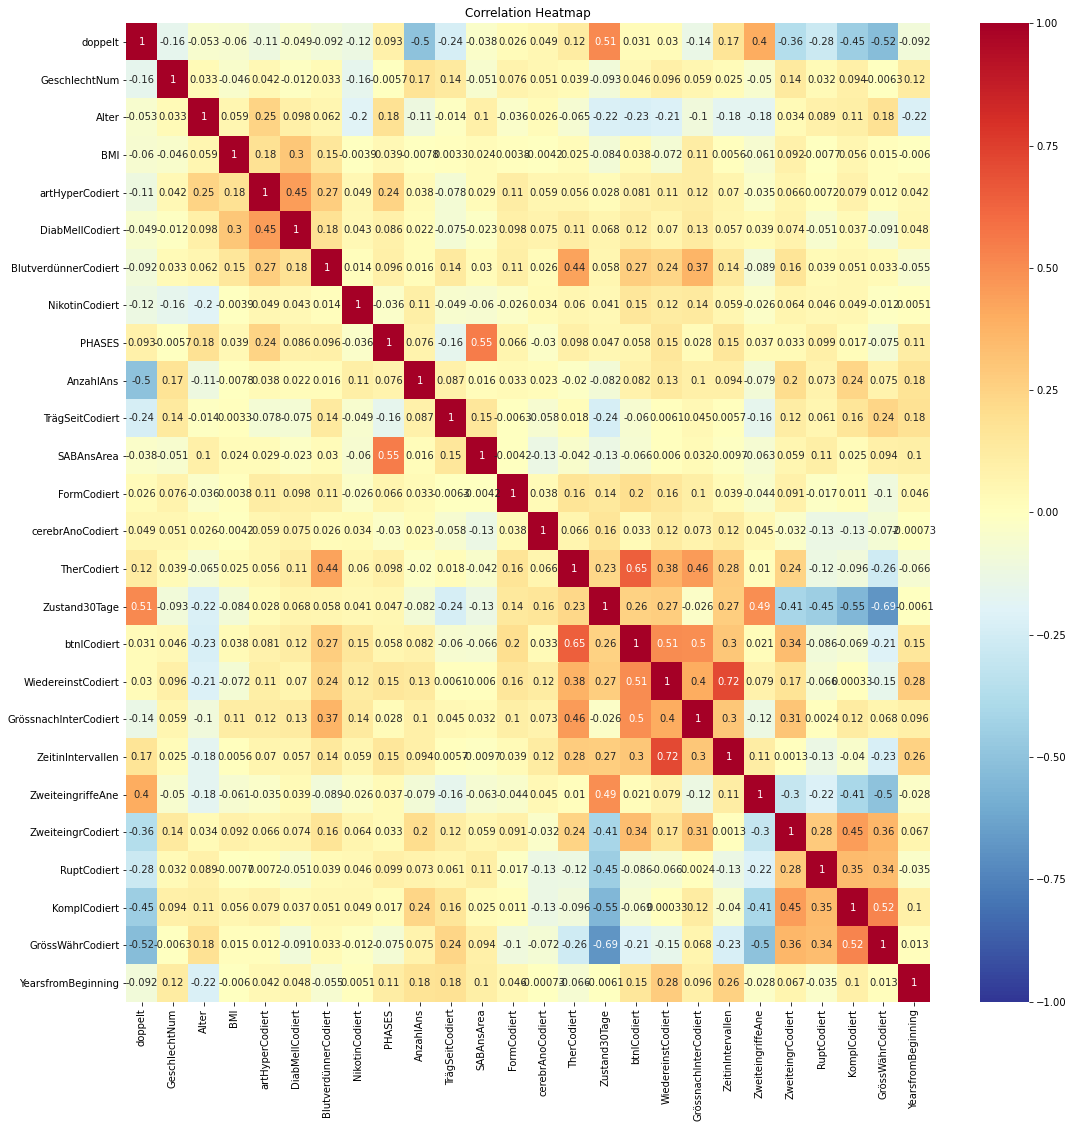

In [88]:
plt.figure(figsize = (18, 18))

# Heatmap of correlations
sns.heatmap(all_features_corrs_all, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1)
plt.title('Correlation Heatmap');

In [89]:
newdf=newdf.drop([ 'AlterGebärf','Altersklassen','BMIKlassen','TrägZusCodiert','LängeGruppiert','LängePhases' ,'VglOffenInterv','Zustand1Jahr','GOSlängstmöglich','ZeitzumReEinstrom','filter_$' ], axis=1)

In [90]:
newdf.shape

(447, 27)

In [91]:
newdf['newlabel']=newdf['label']%2
newdf=newdf.drop(['label'], axis=1)


In [92]:
Y = newdf.newlabel.values
X = newdf.drop("newlabel", axis=1).values

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 20)

Ideal: 0.983
> folds=2, accuracy=0.990 (0.990,0.990)
> folds=3, accuracy=0.977 (0.962,0.992)
> folds=4, accuracy=0.982 (0.970,1.000)
> folds=5, accuracy=0.985 (0.975,1.000)
> folds=6, accuracy=0.980 (0.970,1.000)
> folds=7, accuracy=0.980 (0.965,1.000)
> folds=8, accuracy=0.982 (0.960,1.000)
> folds=9, accuracy=0.983 (0.955,1.000)
> folds=10, accuracy=0.980 (0.950,1.000)
> folds=11, accuracy=0.982 (0.944,1.000)
> folds=12, accuracy=0.985 (0.970,1.000)
> folds=13, accuracy=0.980 (0.935,1.000)
> folds=14, accuracy=0.978 (0.931,1.000)
> folds=15, accuracy=0.980 (0.926,1.000)
> folds=16, accuracy=0.980 (0.960,1.000)
> folds=17, accuracy=0.978 (0.917,1.000)
> folds=18, accuracy=0.982 (0.909,1.000)
> folds=19, accuracy=0.980 (0.905,1.000)
> folds=20, accuracy=0.982 (0.950,1.000)
> folds=21, accuracy=0.980 (0.895,1.000)
> folds=22, accuracy=0.982 (0.889,1.000)
> folds=23, accuracy=0.980 (0.882,1.000)
> folds=24, accuracy=0.985 (0.941,1.000)
> folds=25, accuracy=0.978 (0.875,1.000)
> folds=26,

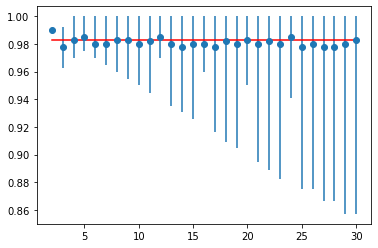

In [63]:
# sensitivity analysis of k in k-fold cross-validation
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate the model using a given test condition
def evaluate_model(cv):
    # get the dataset
    y = newdf.newlabel.values
    X = newdf.drop("newlabel", axis=1).values
    # get the model
    model = ensemble.RandomForestClassifier(criterion='entropy', 
                                        max_depth= 100, 
                                        max_features= 0.5, 
                                        min_samples_leaf= 10, 
                                        min_samples_split= 10, 
                                        n_estimators= 300, 
                                        random_state=30)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()

# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()

In [40]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # define the model
    model = ensemble.RandomForestClassifier()
    # define search space
    space = dict()
#     space['n_estimators'] = [10, 100, 500]
#     space['max_features'] = [2, 4, 6]
    
    space['max_depth']= [2,3,4]
    space['criterion'] = ['gini', 'entropy']
    space['max_features']= [0.3,0.5]
    space['min_samples_leaf']= [5,10,15]
    space[ 'min_samples_split']= [2,5,10]
    space['n_estimators']= [100,200]
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))


>acc=0.975, est=0.989, cfg={'criterion': 'gini', 'max_depth': 200, 'max_features': 0.3, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}
>acc=1.000, est=0.986, cfg={'criterion': 'gini', 'max_depth': 100, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
>acc=0.975, est=0.992, cfg={'criterion': 'entropy', 'max_depth': 100, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
>acc=1.000, est=0.989, cfg={'criterion': 'gini', 'max_depth': 100, 'max_features': 0.3, 'min_samples_leaf': 15, 'min_samples_split': 5, 'n_estimators': 100}
>acc=0.975, est=0.997, cfg={'criterion': 'entropy', 'max_depth': 200, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
>acc=0.975, est=0.992, cfg={'criterion': 'gini', 'max_depth': 100, 'max_features': 0.3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
>acc=0.975, est=0.992, cfg={'criterion': 'gini', 'max_

NameError: name 'folds' is not defined

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.997


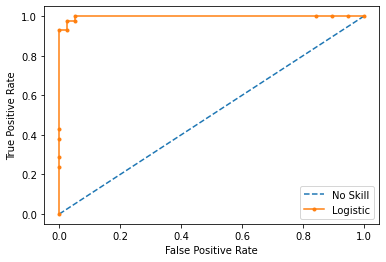

In [53]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
y = newdf.newlabel.values
X = newdf.drop("newlabel", axis=1).values
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = ensemble.RandomForestClassifier(criterion='entropy', 
                                        max_depth= 100, 
                                        max_features= 0.5, 
                                        min_samples_leaf= 10, 
                                        min_samples_split= 10, 
                                        n_estimators= 300, 
                                        random_state=30)
model.fit(trainX, trainy)
# print(model.best_score_)
# print(model.best_estimator_.get_params())
# model=model.best_estimator_.get_params()

# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [86]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
y = newdf.newlabel.values
X = newdf.drop("newlabel", axis=1).values
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.4, random_state=2)
# generate a no skill prediction (majority class
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = ensemble.RandomForestClassifier(criterion='entropy', 
                                        max_depth= 100, 
                                        max_features= 0.5, 
                                        min_samples_leaf= 10, 
                                        min_samples_split= 10, 
                                        n_estimators= 300, 
                                        random_state=30)
model.fit(trainX, trainy)
# print(model.best_score_)
# print(model.best_estimator_.get_params())
# model=model.best_estimator_.get_params()

# predict probabilities
lr_probs = model.predict(testX)
a=metrics.confusion_matrix(testy,lr_probs)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print("f1_score :", f1_score(testy,lr_probs))
print("precision_score :" ,precision_score(testy,lr_probs))
print("recall :", recall_score(testy,lr_probs))
print("Accuracy :", accuracy_score(testy,lr_probs))
print(a)

f1_score : 0.9876543209876543
precision_score : 0.9876543209876543
recall : 0.9876543209876543
Accuracy : 0.9875
[[78  1]
 [ 1 80]]


In [54]:
# automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# create dataset
y = newdf.newlabel.values
X = newdf.drop("newlabel", axis=1).values
#X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = RandomForestClassifier(random_state=1)
# define search space
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.982 (0.016)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000
>acc=0.975, est=0.989, cfg={'criterion': 'entropy', 'max_depth': 200, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000
>acc=1.000, est=0.986, cfg={'criterion': 'gini', 'max_depth': 100, 'max_features': 0.3, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000
>acc=0.975, est=0.992, cfg={'criterion': 'gini', 'max_depth': 100, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000
>acc=1.000, est=0.986, cfg={'criterion': 'gini', 'max_depth': 100, 'max_features': 0.3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
No Skill: ROC AUC=0.500
Logistic: ROC AUC=1.000
>acc=0.950, est=0.994, cfg={'criterion': 'entropy', 'max_depth': 100, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split

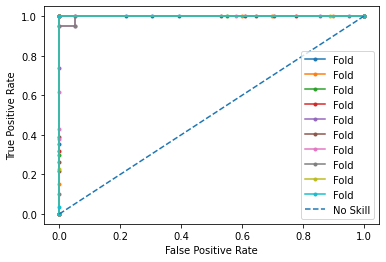

In [66]:
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
pyplot.figure()
cv_outer = KFold(n_splits=20, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()

for train_ix, test_ix in cv_outer.split(X):
    # split data
    print("train_ix, test_ix", train_ix, test_ix)
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)
    # define the model
    model = ensemble.RandomForestClassifier()
    # define search space
    space = dict()
#     space['n_estimators'] = [10, 100, 500]
#     space['max_features'] = [2, 4, 6]
    
    space['max_depth']= [100, 200]
    space['criterion'] = ['gini', 'entropy']
    space['max_features']= [0.3,0.5]
    space['min_samples_leaf']= [5,10,15]
    space[ 'min_samples_split']= [2,5,10]
    space['n_estimators']= [100,200]
    # define search
    search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    yhat_probs = best_model.predict_proba(X_test)
    yhat_probs = yhat_probs[:,1]
    ns_probs = [0 for _ in range(len(y_test))]

    
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, yhat_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, yhat_probs)
    # plot the roc curve for the model
    
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Fold')

    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the modela
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# create dataset
y = newdf.newlabel.values
X = newdf.drop("newlabel", axis=1).values
#X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = RandomForestClassifier(random_state=1)
# define search space
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [96]:
# automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# create dataset
y = newdf.newlabel.values
X = newdf.drop("newlabel", axis=1).values
#X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = RandomForestClassifier(random_state=1)
# define search space
space = dict() 
space['max_depth']= [10, 15, 20, 25]
space['max_features']= ['auto','sqrt','log2']
space['min_samples_split'] = [15,20,25,30]
space['n_estimators']= [100, 200]
space['min_samples_leaf']=[10,15,20,25]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=1, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, X, y, scoring='accuracy', cv=cv_outer, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 1.000 (0.000)


In [13]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    
score = model_selection.cross_val_score(ensemble.RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=15,random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Fold:1, Train set: 320, Test set:80
Fold:2, Train set: 320, Test set:80
Fold:3, Train set: 320, Test set:80
Fold:4, Train set: 320, Test set:80
Fold:5, Train set: 320, Test set:80
Scores for each fold are: [1.    0.975 0.95  1.    1.   ]
Average score: 0.98


In [94]:
    from sklearn import tree
    from sklearn.model_selection import train_test_split
#     X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state = 20)
#     Y_train = Y_train.newlabel.values
#     X_train = X_train.drop("newlabel", axis=1).values
#     Y_test = X_test.newlabel.values
#     X_test = Y_test.drop("newlabel", axis=1).values

    model = RandomForestClassifier(n_estimators=3, random_state=30, max_depth=10, min_samples_leaf=10, min_samples_split=15)
    model.fit(X_train, Y_train)
    
    train_test = model.predict(X_train)
    
    acc_train = metrics.f1_score(Y_train, train_test)
    print(acc_train)
    
    prediction_test = model.predict(X_test)
    
    acc = metrics.f1_score(Y_test, prediction_test)
    acc_recall = metrics.recall_score(Y_test, prediction_test)
    acc_precision = metrics.precision_score(Y_test, prediction_test)
    acc_confusion = metrics.confusion_matrix(Y_test, prediction_test)
    print("acc aayi hai", acc, acc_recall, acc_precision, acc_confusion)

0.9972451790633609
acc aayi hai 1.0 1.0 1.0 [[46  0]
 [ 0 44]]
